In [28]:
#libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
#data load
target_CL = pd.read_csv("C:/Users/Filip/Desktop/kbc/targeted_CL.csv")
target_CL = target_CL.loc[:,['Client', 'expected_revenue', 'probabilities_CL']]
target_CL.rename(columns = {'expected_revenue':'expected_revenue_CL'}, inplace = True)

target_CC = pd.read_csv("C:/Users/Filip/Desktop/kbc/targeted_CC.csv")
target_CC = target_CC.loc[:,['Client', 'expected_revenue', 'probabilities_CC']]
target_CC.rename(columns = {'expected_revenue':'expected_revenue_CC'}, inplace = True)

target_MF = pd.read_csv("C:/Users/Filip/Desktop/kbc/targeted_MF.csv")
target_MF = target_MF.loc[:,['Client', 'expected_revenue', 'probabilities_MF']]
target_MF.rename(columns = {'expected_revenue':'expected_revenue_MF'}, inplace = True)

clients =  pd.read_csv("C:/Users/Filip/Desktop/kbc/test_set.csv")

In [30]:
#merging selected clients from each model together (CC, CL, MF)

targeted_all = target_CL.merge(target_CC,on='Client', how='outer').merge(target_MF,on='Client', how='outer')

In [31]:
targeted_all.columns


Index(['Client', 'expected_revenue_CL', 'probabilities_CL',
       'expected_revenue_CC', 'probabilities_CC', 'expected_revenue_MF',
       'probabilities_MF'],
      dtype='object')

In [32]:
targeted_all

,Client,expected_revenue_CL,probabilities_CL,expected_revenue_CC,probabilities_CC,expected_revenue_MF,probabilities_MF
0,243,26.773984,0.654203,6.251723,0.568489,NaN,NaN
1,697,18.247985,0.663028,NaN,NaN,1.722963,0.312935
2,532,12.838623,0.585580,NaN,NaN,10.671883,0.472456
3,681,11.147859,0.804217,NaN,NaN,NaN,NaN
4,978,10.885374,0.722838,2.526672,0.814006,NaN,NaN
...,...,...,...,...,...,...,...
241,983,NaN,NaN,NaN,NaN,1.341520,0.387402
242,1440,NaN,NaN,NaN,NaN,1.330063,0.465953
243,1482,NaN,NaN,NaN,NaN,1.288083,0.311557
244,432,NaN,NaN,NaN,NaN,1.273552,0.300810


In [33]:
#filling NAs as 0

for col in targeted_all.columns:
    targeted_all[col] = np.where(targeted_all[col].isnull() , 0, targeted_all[col])

In [34]:
targeted_all.head()

,Client,expected_revenue_CL,probabilities_CL,expected_revenue_CC,probabilities_CC,expected_revenue_MF,probabilities_MF
0,243,26.773984,0.654203,6.251723,0.568489,0.000000,0.000000
1,697,18.247985,0.663028,0.000000,0.000000,1.722963,0.312935
2,532,12.838623,0.585580,0.000000,0.000000,10.671883,0.472456
3,681,11.147859,0.804217,0.000000,0.000000,0.000000,0.000000
4,978,10.885374,0.722838,2.526672,0.814006,0.000000,0.000000


In [35]:
#selecting what offer would yield to the highest ER

targeted_all['offer_CL'] = np.where((targeted_all['expected_revenue_CL']>targeted_all['expected_revenue_CC']) & 
                                   (targeted_all['expected_revenue_CL']>targeted_all['expected_revenue_MF']),1,0)

targeted_all['offer_CC'] = np.where((targeted_all['expected_revenue_CC']>targeted_all['expected_revenue_CL']) & 
                                   (targeted_all['expected_revenue_CC']>targeted_all['expected_revenue_MF']),1,0)

targeted_all['offer_MF'] = np.where((targeted_all['expected_revenue_MF']>targeted_all['expected_revenue_CC']) & 
                                   (targeted_all['expected_revenue_MF']>targeted_all['expected_revenue_CL']),1,0)

In [36]:
#selecting the highest ER possibility for each client

targeted_all['max_possible_ER']=np.amax(targeted_all.loc[:,['expected_revenue_CL', 'expected_revenue_CC', 'expected_revenue_MF']], axis=1)

In [37]:
targeted_all

,Client,expected_revenue_CL,probabilities_CL,expected_revenue_CC,probabilities_CC,expected_revenue_MF,probabilities_MF,offer_CL,offer_CC,offer_MF,max_possible_ER
0,243,26.773984,0.654203,6.251723,0.568489,0.000000,0.000000,1,0,0,26.773984
1,697,18.247985,0.663028,0.000000,0.000000,1.722963,0.312935,1,0,0,18.247985
2,532,12.838623,0.585580,0.000000,0.000000,10.671883,0.472456,1,0,0,12.838623
3,681,11.147859,0.804217,0.000000,0.000000,0.000000,0.000000,1,0,0,11.147859
4,978,10.885374,0.722838,2.526672,0.814006,0.000000,0.000000,1,0,0,10.885374
...,...,...,...,...,...,...,...,...,...,...,...
241,983,0.000000,0.000000,0.000000,0.000000,1.341520,0.387402,0,0,1,1.341520
242,1440,0.000000,0.000000,0.000000,0.000000,1.330063,0.465953,0,0,1,1.330063
243,1482,0.000000,0.000000,0.000000,0.000000,1.288083,0.311557,0,0,1,1.288083
244,432,0.000000,0.000000,0.000000,0.000000,1.273552,0.300810,0,0,1,1.273552


In [38]:
#sorting and selecting TOP 100

targeted_all.sort_values(by=['max_possible_ER'], inplace=True, ascending=False )
targeted_all = targeted_all.iloc[0:100,:].copy().reset_index()
targeted_all.to_csv('targeted_final_selection.csv')

In [39]:
targeted_all.max_possible_ER.sum()

739.2859236084491

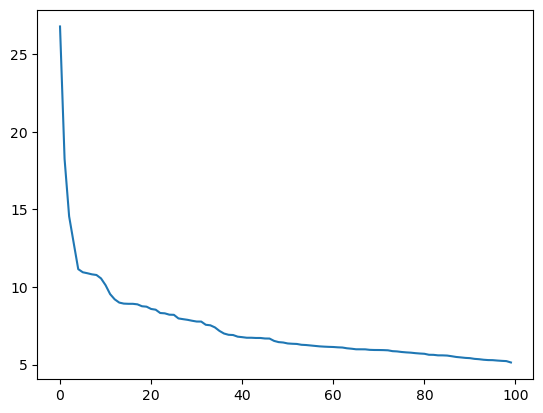

In [40]:
plt.plot(targeted_all['max_possible_ER'])

In [41]:
targeted_all.offer_CL.sum()

82

In [42]:
targeted_all.offer_CC.sum()

13

In [43]:
targeted_all.offer_MF.sum()

5

In [44]:
targeted_all.loc[targeted_all['offer_CL']==1].max_possible_ER.sum()/targeted_all.max_possible_ER.sum()

0.805034076729125

In [45]:
targeted_all.loc[targeted_all['offer_CC']==1].max_possible_ER.sum()/targeted_all.max_possible_ER.sum()

0.14569211758878461

In [46]:
targeted_all.loc[targeted_all['offer_MF']==1].max_possible_ER.sum()/targeted_all.max_possible_ER.sum()

0.049273805682090464

In [49]:
#addind details about selected TOP 100 clients

targets_and_details = targeted_all.merge(clients,on='Client',how='left')
targets_and_details.to_csv('targets_and_details.csv')

C:\Users\Filip\AppData\Local\Temp\ipykernel_6488\3249947465.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset[variable], hist = True, kde = False,


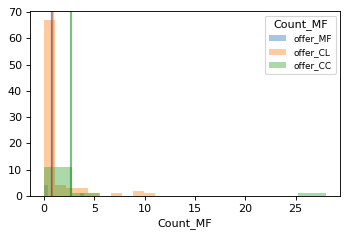

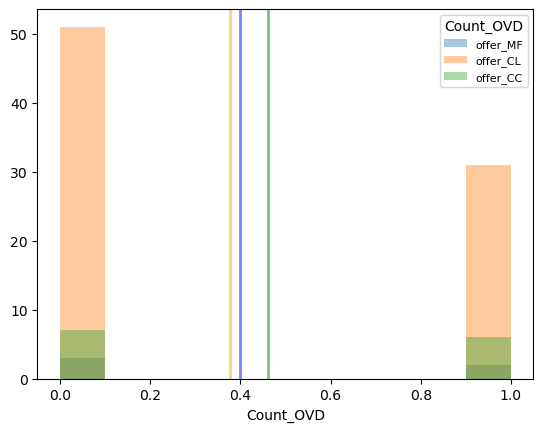

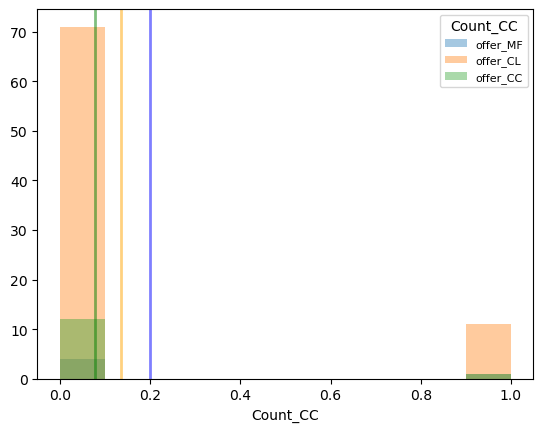

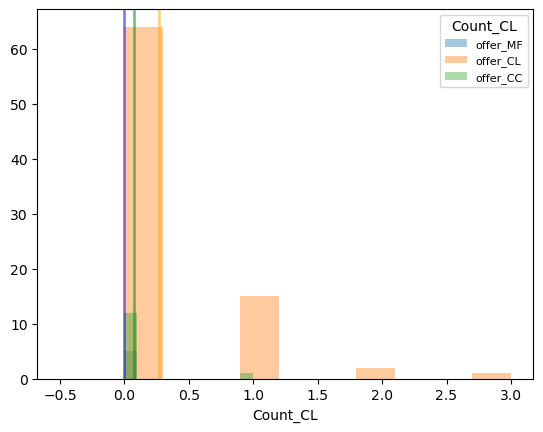

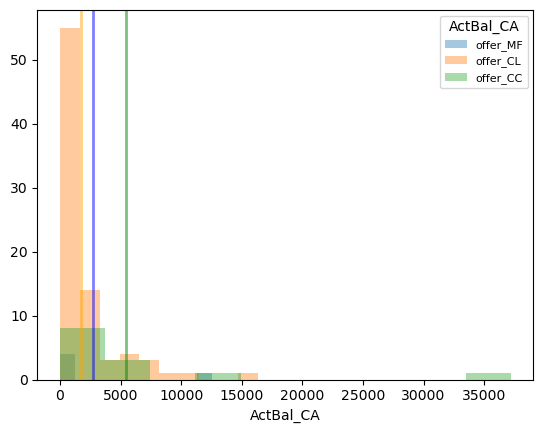

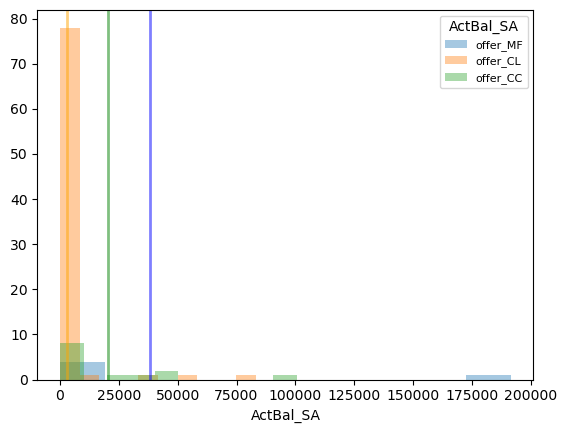

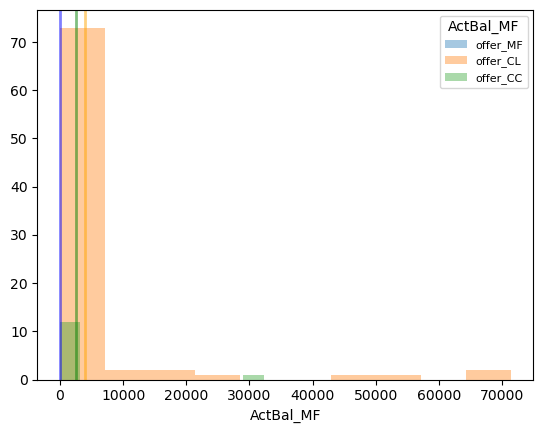

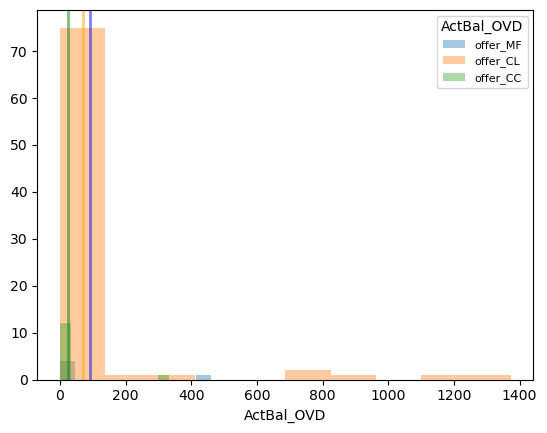

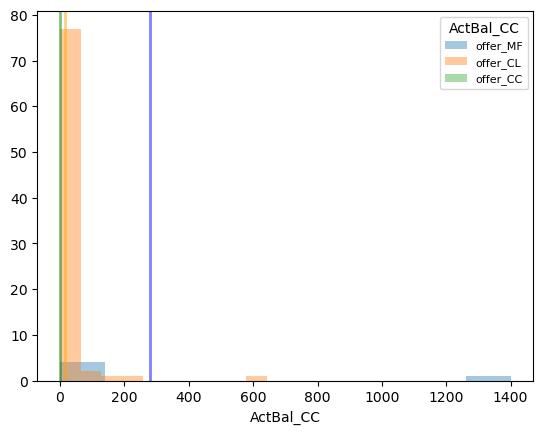

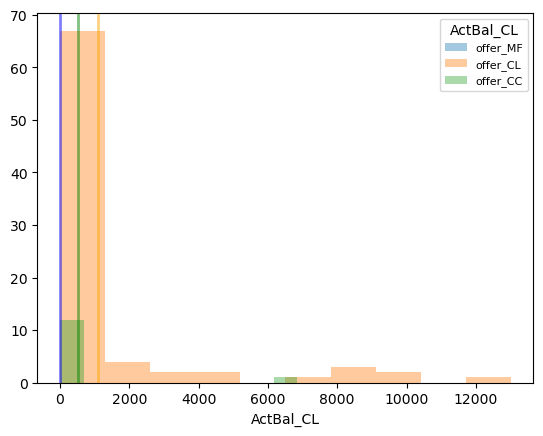

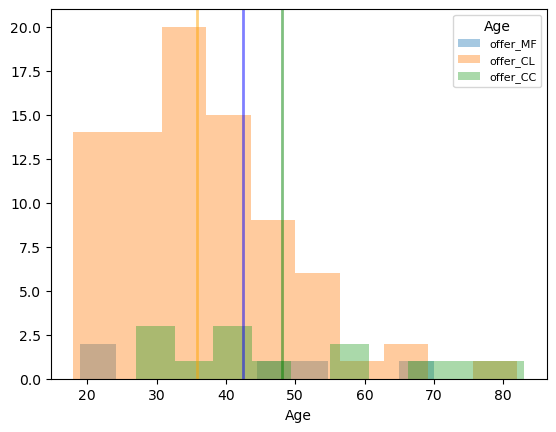

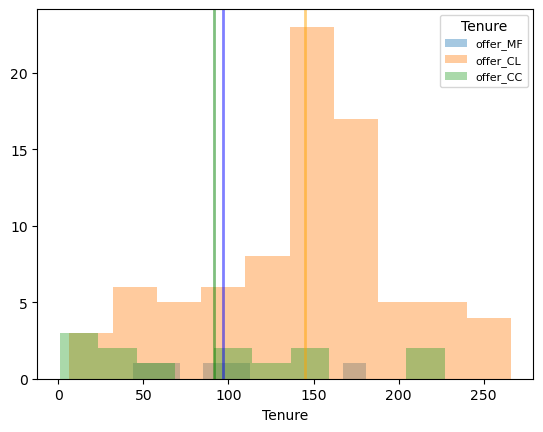

C:\Users\Filip\anaconda3\lib\site-packages\seaborn\distributions.py:2479: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Filip\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


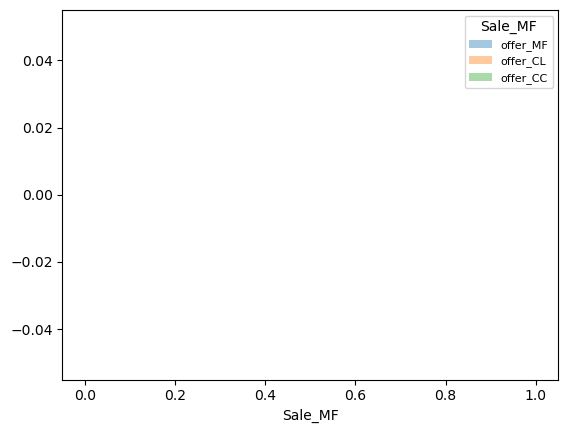

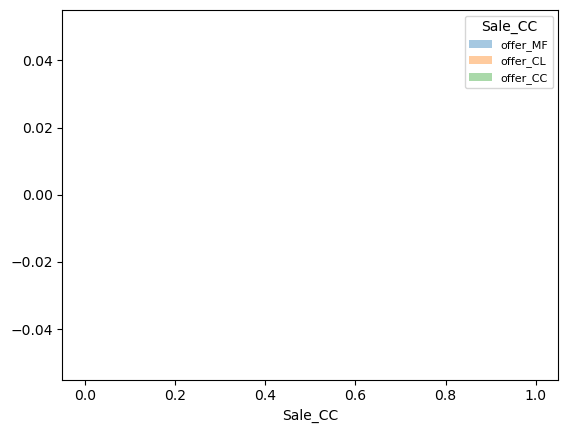

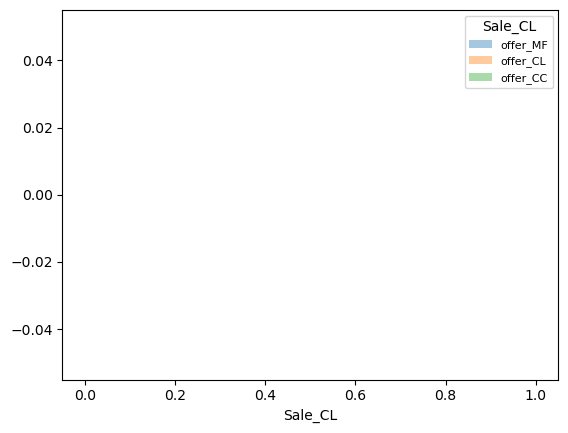

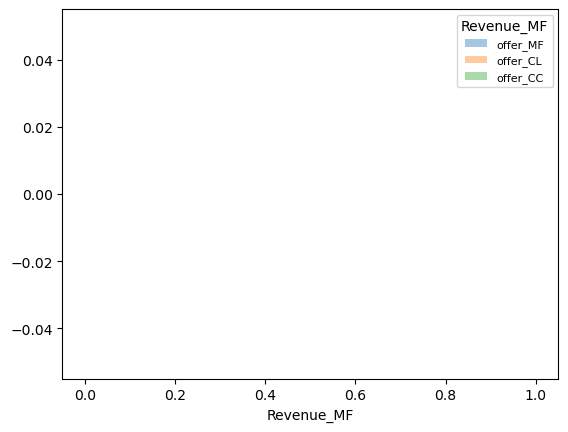

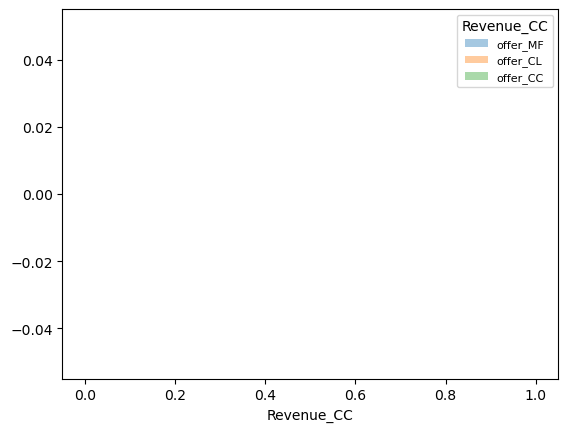

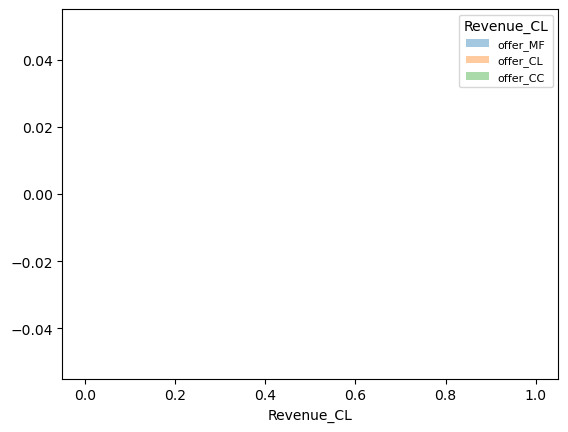

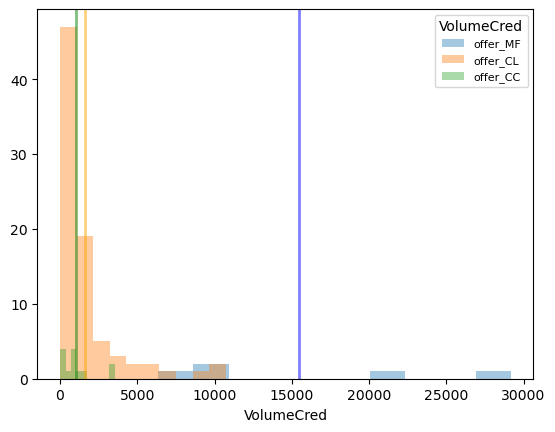

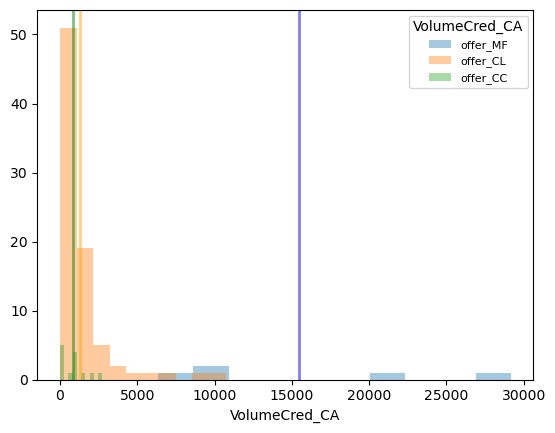

In [48]:


plt.figure(num=None, figsize=(5, 3), dpi=80, facecolor='w', edgecolor='k')

only_numericals = [features for features in targets_and_details.select_dtypes('number').columns ]

for variable in only_numericals[15:35]:
    for x in ['offer_MF', 'offer_CL', 'offer_CC']:
    # Subset to species
        subset = targets_and_details[targets_and_details[x] == 1]
    
    # Draw the density plot
        sns.distplot(subset[variable], hist = True, kde = False,
                 kde_kws = {'linewidth': 1, 'shade' : True},
                 bins=10,
                 label = x)

    
    plt.axvline(targets_and_details[targets_and_details["offer_MF"] == 1][variable].mean(), color='blue', linestyle='solid', linewidth=2, alpha = 0.5)
    plt.axvline(targets_and_details[targets_and_details["offer_CL"] == 1][variable].mean(), color='orange', linestyle='solid', linewidth=2, alpha = 0.5)
    plt.axvline(targets_and_details[targets_and_details["offer_CC"] == 1][variable].mean(), color='green', linestyle='solid', linewidth=2, alpha = 0.5)
    plt.legend(prop={'size': 8}, title = variable)
    plt.show()